In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(font_scale = 1.2)

In [3]:
custom_palette = sns.color_palette("husl", 16)
custom_palette[0], custom_palette[10] = custom_palette[10], custom_palette[0]
custom_palette[2], custom_palette[14] = custom_palette[14], custom_palette[2]
custom_palette[4], custom_palette[12] = custom_palette[12], custom_palette[4]
custom_palette[6], custom_palette[1] = custom_palette[1], custom_palette[6] 
custom_palette[8], custom_palette[13] = custom_palette[13], custom_palette[8]
custom_palette

[(0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491),
 (0.7008633391290917, 0.6080365980075504, 0.19419512204856468),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.4225883781014591, 0.677943504931845, 0.19271544738133076),
 (0.9688417625390765, 0.46710871459052145, 0.1965441952393453),
 (0.20518528131112956, 0.6851497738530601, 0.5562527763557915),
 (0.8397010947263905, 0.4529020995703274, 0.9578638063653008),
 (0.21576108198845112, 0.6690446872415565, 0.7201192992055431),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3531380715309417, 0.6201408220829481, 0.9586195235634788),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.9645179518697552, 0.41602112206844516, 0.708820872610067)]

In [4]:
def gen_f1_plot(csv_names, model_names):
    if len(csv_names) != len(model_names):
        print('Number of CSV files don\'t match model names')
        return

    dfs = []
    for i in range(len(csv_names)):
        df = pd.read_csv(f'f1scores/{csv_names[i]}.csv')
        df.insert(0, 'Model', model_names[i], True)
        dfs.append(df)
    
    all_df = pd.concat(dfs, ignore_index = True, sort = False)
    all_df.groupby('Model')
    sns.set_style('whitegrid')

    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    g = sns.lineplot(ax = ax, x = 'Threshold', y = 'F1', hue = 'Model', marker = 'o', data = all_df)
    g.legend_.set_title(None)
    ax.set(xlabel = 'IoU Threshold', ylabel = 'F1 Score')
    ax.set(ylim=(0, 1))
    plt.setp(g.collections, alpha=.7) #for the markers
    plt.setp(g.lines, alpha=.7)       #for the lines

## Watershed

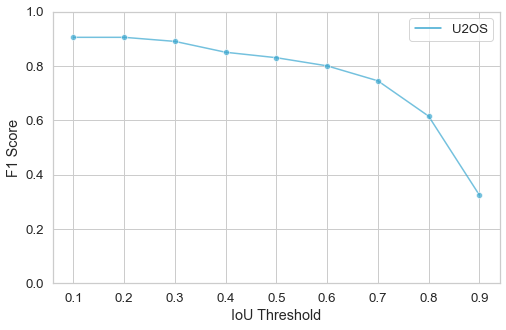

In [5]:
with sns.color_palette(custom_palette[:]):
    csv_names = ['watershed']
    model_names = ['U2OS']
    gen_f1_plot(csv_names, model_names)
    plt.ylim([0, 1])

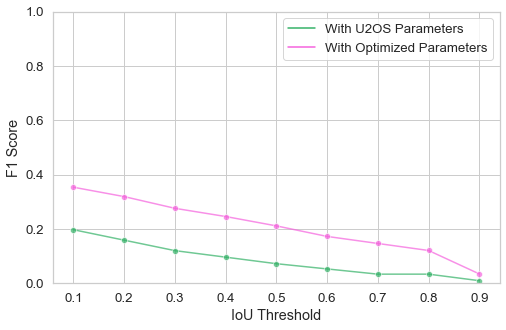

In [6]:
with sns.color_palette(custom_palette[1:]):
    csv_names = ['4t1_watershed', '4t1_watershed_opt']
    model_names = ['With U2OS Parameters', 'With Optimized Parameters']
    gen_f1_plot(csv_names, model_names)

## Pretrained StarDist vs Pretrained StarDist + 5/10 Additional Nuclei Images

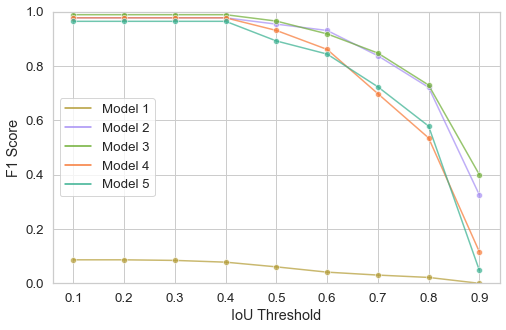

In [7]:
with sns.color_palette(custom_palette[3:]):
    csv_names = ['model1', 'default_thresh/model2', 'default_thresh/model3', 'default_thresh/model4', 'default_thresh/model5']
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
    gen_f1_plot(csv_names, model_names)

## StarDist with Augmenters

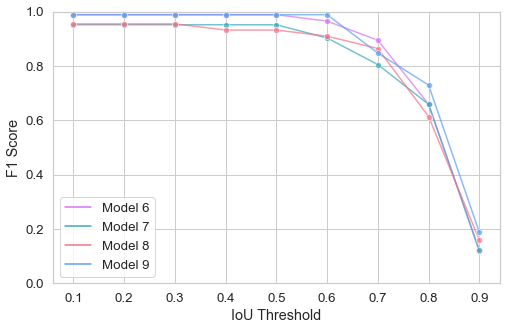

In [8]:
with sns.color_palette(custom_palette[8:]):
    csv_names = ['default_thresh/model6', 'default_thresh/model7', 'default_thresh/model8', 'default_thresh/model9']
    model_names = ['Model 6', 'Model 7', 'Model 8', 'Model 9']
    gen_f1_plot(csv_names, model_names)

## StarDist with smFISH Input

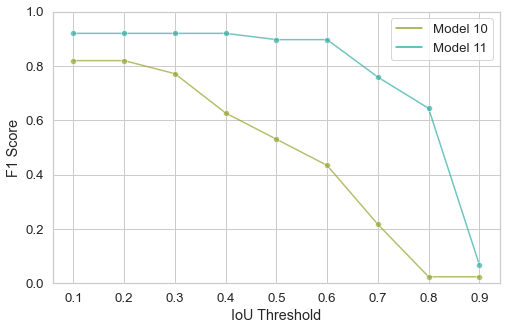

In [9]:
with sns.color_palette(custom_palette[12:]):
    csv_names = ['model10', 'model11']
    model_names = ['Model 10', 'Model 11']
    gen_f1_plot(csv_names, model_names)

## SplineDist

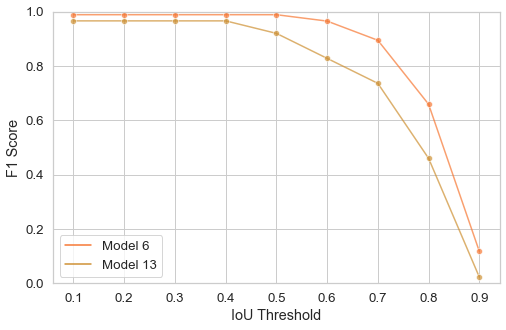

In [10]:
with sns.color_palette(custom_palette[6:7] + custom_palette[14:]):
    csv_names = ['default_thresh/model6', 'default_thresh/model13']
    model_names = ['Model 6', 'Model 13']
    gen_f1_plot(csv_names, model_names)

## All Models on 4t1 Cells

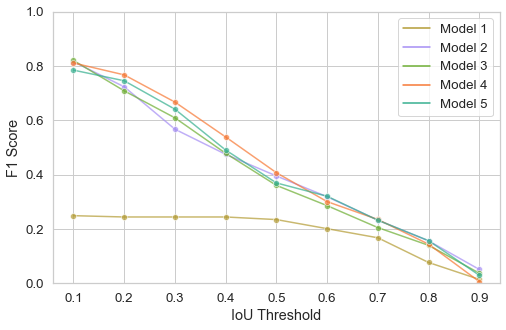

In [11]:
with sns.color_palette(custom_palette[3:]):
    csv_names = ['4t1_model1', 'default_thresh/4t1_model2', 'default_thresh/4t1_model3', 'default_thresh/4t1_model4', 'default_thresh/4t1_model5']
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
    gen_f1_plot(csv_names, model_names)

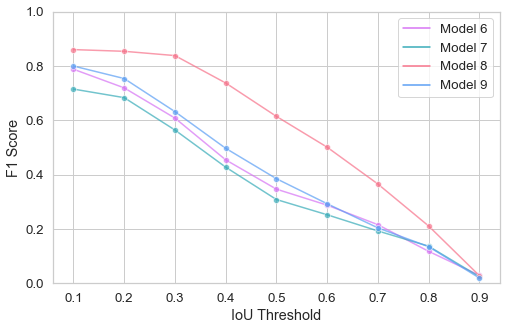

In [12]:
with sns.color_palette(custom_palette[8:]):
    csv_names = ['default_thresh/4t1_model6', 'default_thresh/4t1_model7', 'default_thresh/4t1_model8', 'default_thresh/4t1_model9']
    model_names = ['Model 6', 'Model 7', 'Model 8', 'Model 9']
    gen_f1_plot(csv_names, model_names)


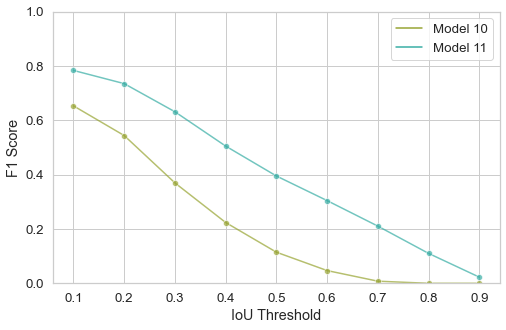

In [13]:
with sns.color_palette(custom_palette[12:]):
    csv_names = ['default_thresh/4t1_model10', 'default_thresh/4t1_model11']
    model_names = ['Model 10', 'Model 11']
    gen_f1_plot(csv_names, model_names)

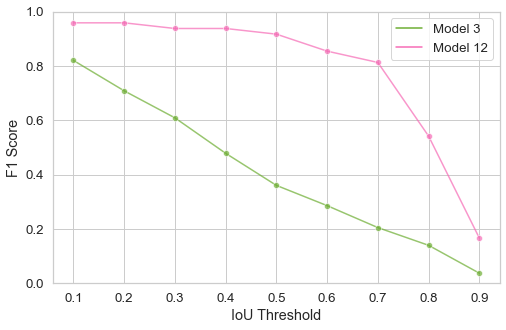

In [15]:
with sns.color_palette(custom_palette[5:6] + custom_palette[15:]):
    csv_names = ['default_thresh/4t1_model3', 'default_thresh/4t1_model12']
    model_names = ['Model 3', 'Model 12']
    gen_f1_plot(csv_names, model_names)

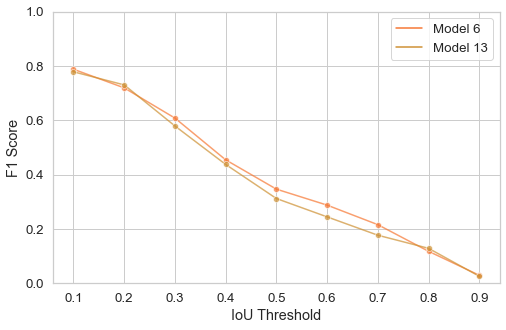

In [14]:
 with sns.color_palette(custom_palette[6:7] + custom_palette[14:]):
    csv_names = ['default_thresh/4t1_model6', 'default_thresh/4t1_model13']
    model_names = ['Model 6', 'Model 13']
    gen_f1_plot(csv_names, model_names)
 
 
